In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
"""Data from https://archive.ics.uci.edu/ml/datasets/Student+Performance"""
df = pd.read_csv("../data/student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences', 'freetime', 'traveltime']]
df

,G1,G2,G3,studytime,failures,absences,freetime,traveltime
0,5,6,6,2,0,6,3,2
1,5,5,6,2,0,4,3,1
2,7,8,10,2,3,10,3,1
3,15,14,15,3,0,2,2,1
4,6,10,10,2,0,4,3,1
...,...,...,...,...,...,...,...,...
390,9,9,9,2,2,11,5,1
391,14,16,16,1,0,3,4,2
392,10,8,7,1,3,3,5,1
393,11,12,10,1,0,0,4,3


In [5]:
"""Column to predict - G3 (final grade)"""
pred = 'G3'

In [6]:
X = np.array(df.drop(pred, axis=1))
y = np.array(df[pred])

In [7]:
best_score = 0

"""Finding the best model in 1000 iterations"""
for _ in range(1000): 

    X_train, x_test, Y_train, y_test = train_test_split(X,y,train_size=0.8)

    """Linear regression model"""
    model = LinearRegression()
    model.fit(X_train, Y_train)
    score = model.score(x_test, y_test)

    if score > best_score:
        best_score = score
        best_model = model

"""Saving the best model"""
# with open("student-mat.pickle", "wb") as f:
#     pickle.dump(best_model, f)

best_score

0.9307856012489424

In [31]:
predictions = best_model.predict(x_test)

"""Comparing actual vs prediction"""
for i in range(len(predictions)):
    print(f"Actual: {y_test[i]}, Prediction: {round(predictions[i],2)}")

Actual: 8, Prediction: 7.88
Actual: 8, Prediction: 5.75
Actual: 10, Prediction: 10.16
Actual: 0, Prediction: 8.92
Actual: 18, Prediction: 16.06
Actual: 10, Prediction: 11.94
Actual: 0, Prediction: -0.75
Actual: 15, Prediction: 15.66
Actual: 11, Prediction: 10.31
Actual: 11, Prediction: 9.37
Actual: 13, Prediction: 13.15
Actual: 0, Prediction: 5.76
Actual: 11, Prediction: 10.35
Actual: 13, Prediction: 12.55
Actual: 11, Prediction: 11.7
Actual: 10, Prediction: 8.1
Actual: 17, Prediction: 17.33
Actual: 6, Prediction: 5.76
Actual: 10, Prediction: 8.35
Actual: 18, Prediction: 18.73
Actual: 10, Prediction: 8.88
Actual: 12, Prediction: 11.73
Actual: 14, Prediction: 12.95
Actual: 14, Prediction: 13.83
Actual: 11, Prediction: 10.66
Actual: 9, Prediction: 8.63
Actual: 11, Prediction: 11.73
Actual: 7, Prediction: 5.41
Actual: 15, Prediction: 14.45
Actual: 10, Prediction: 9.36
Actual: 15, Prediction: 13.57
Actual: 14, Prediction: 11.86
Actual: 13, Prediction: 12.77
Actual: 9, Prediction: 9.23
Actu

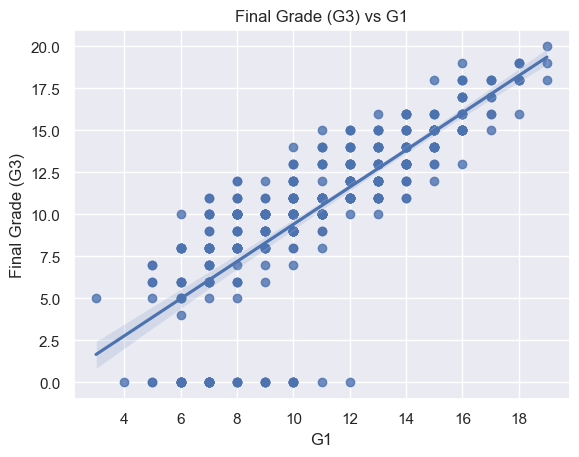

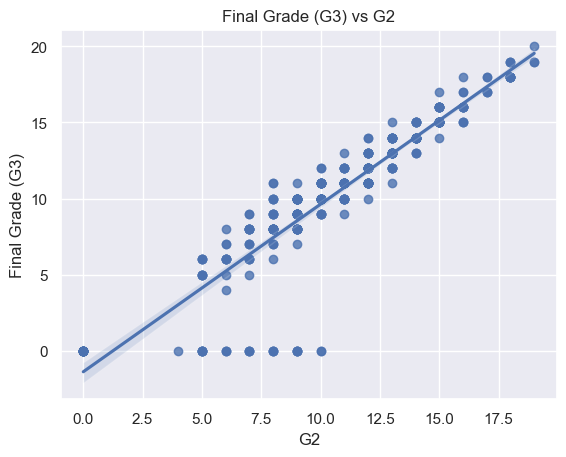

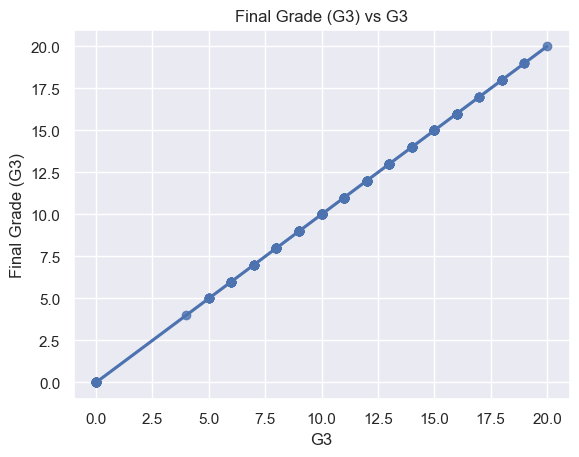

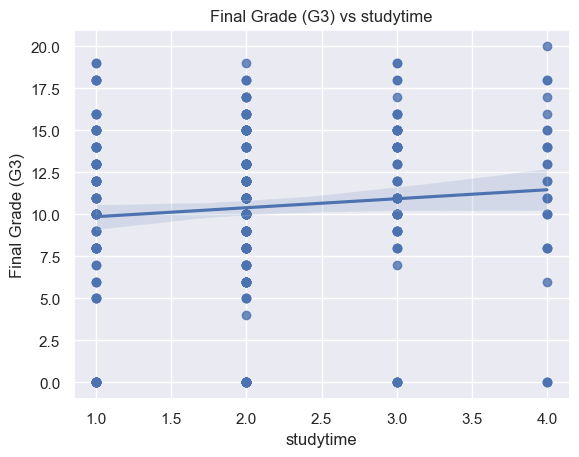

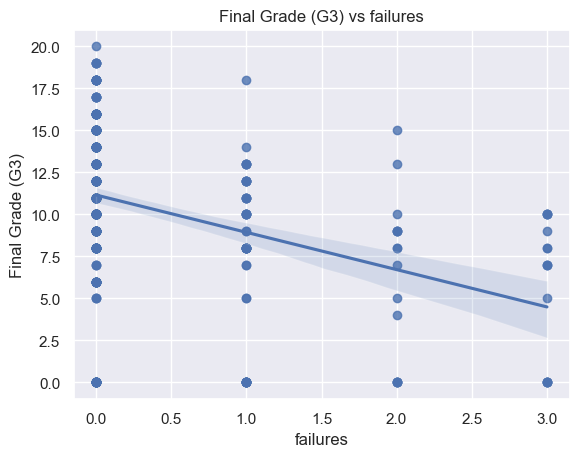

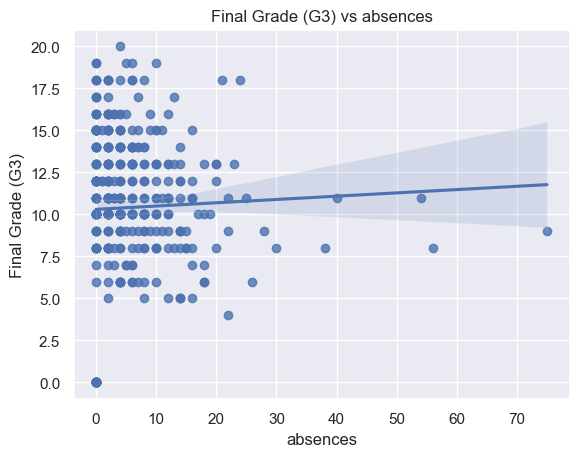

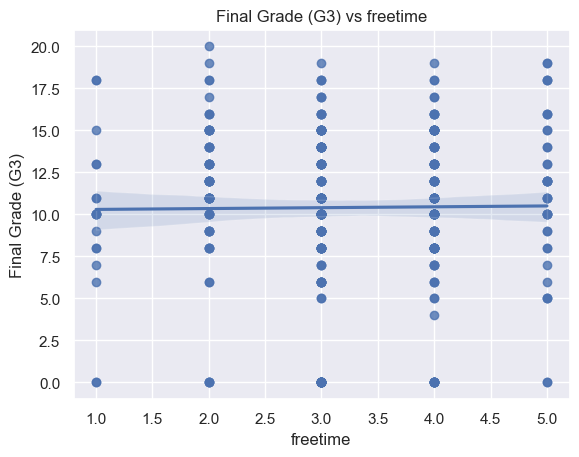

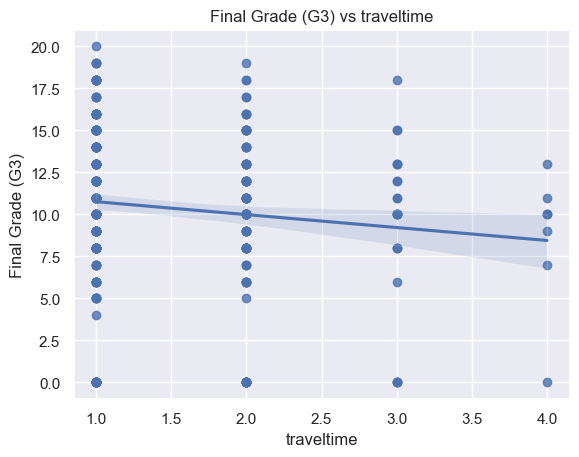

In [30]:
df_columns = df.columns

"""Visualizing the prediction"""
sns.set_theme(style="darkgrid")
for col in df_columns:
    plt.figure()
    sns.regplot(x=col, y="G3", data=df)
    plt.title(f"Final Grade (G3) vs {col}")
    plt.ylabel("Final Grade (G3)")
    plt.show()

<Figure size 640x480 with 0 Axes>

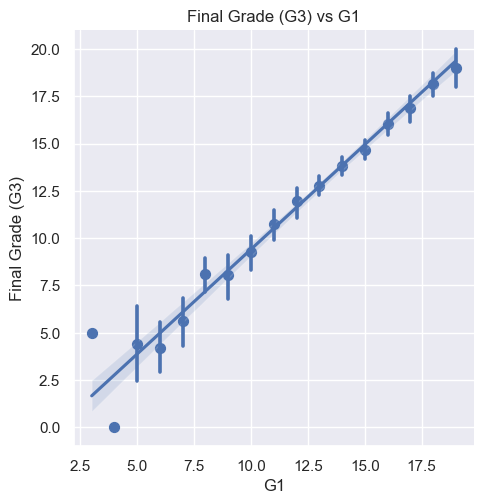

<Figure size 640x480 with 0 Axes>

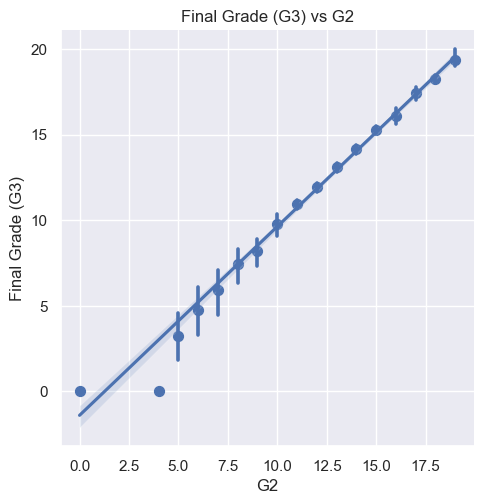

<Figure size 640x480 with 0 Axes>

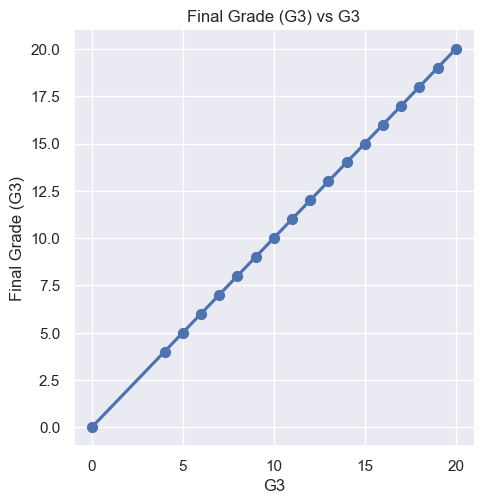

<Figure size 640x480 with 0 Axes>

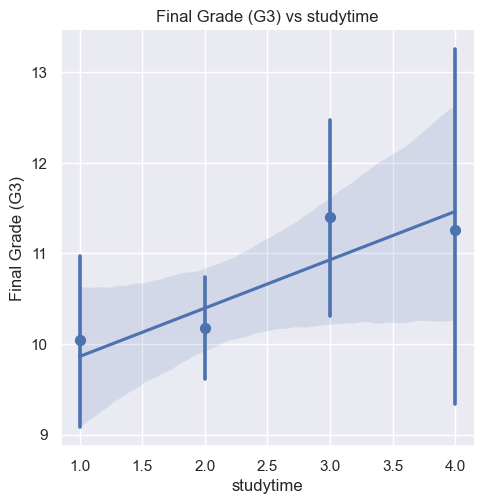

<Figure size 640x480 with 0 Axes>

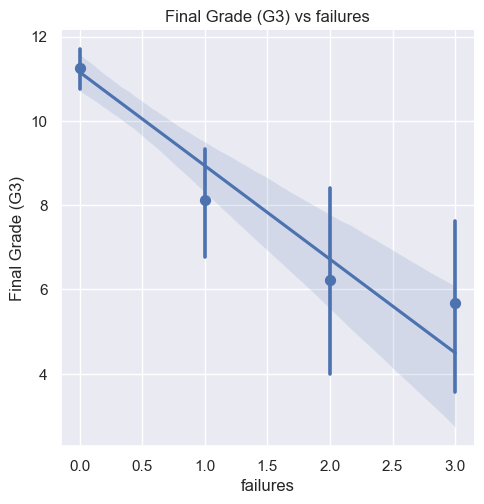

<Figure size 640x480 with 0 Axes>

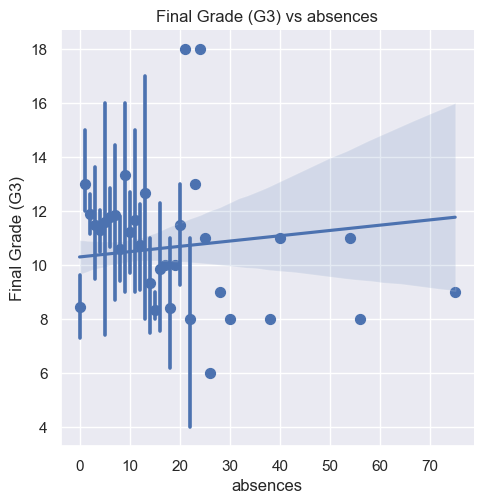

<Figure size 640x480 with 0 Axes>

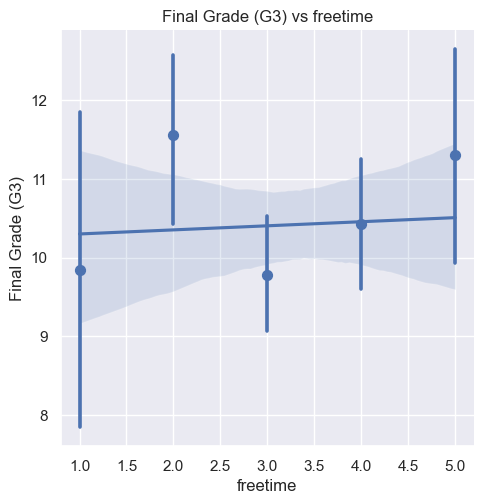

<Figure size 640x480 with 0 Axes>

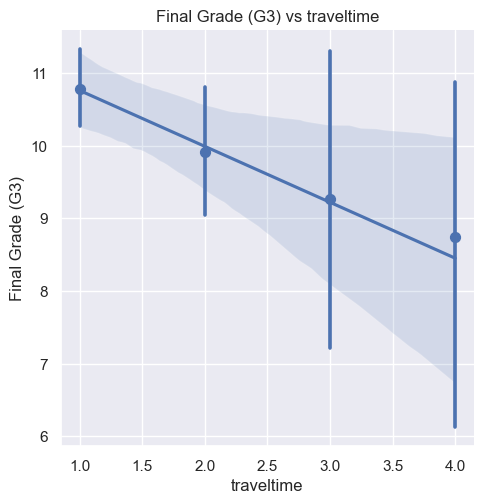

In [33]:
df_columns = df.columns

"""Visualizing the prediction"""
sns.set_theme(style="darkgrid")
for col in df_columns:
    plt.figure()
    sns.lmplot(x=col, y="G3", data=df, x_estimator=np.mean)
    plt.title(f"Final Grade (G3) vs {col}")
    plt.ylabel("Final Grade (G3)")
    plt.show()